In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import scipy

In [18]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.11.0
Num GPUs Available:  0


In [3]:
IMAGE_SIZE = 256

In [102]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(rescale = 1/255)

test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    'Training',
    shuffle = True,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 128,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'Validation',
    shuffle = True,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Testing',
    shuffle = True,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [24]:
classes = train_generator.class_indices
classes

{'Early_Blight': 0, 'Healthy': 1, 'Late_Blight': 2}

In [25]:
classes1 = validation_generator.class_indices
classes1

{'Early_Blight': 0, 'Healthy': 1, 'Late_Blight': 2}

In [48]:
len(train_generator)

26

In [49]:
len(validation_generator)

13

In [50]:
for image_batch, labels_batch in train_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(128, 256, 256, 3)
(128, 3)


In [51]:
for image_batch, labels_batch in validation_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32, 3)


In [52]:
#input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
n_classes = 3

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 256*256 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # 3 output neuron. 
    tf.keras.layers.Dense(3, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 30, 30, 64)      

In [53]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [96]:
EPOCHS = 50

history = model.fit(
      train_generator,
      steps_per_epoch = 8,  
      epochs = EPOCHS,
      verbose = 1,
      validation_data = validation_generator,
      validation_steps = 8
)

Epoch 1/50
8/8 [==============================] - 21s 3s/step - loss: 0.4570 - accuracy: 0.8174 - val_loss: 0.2966 - val_accuracy: 0.8906
Epoch 2/50
8/8 [==============================] - 19s 2s/step - loss: 0.3585 - accuracy: 0.8564 - val_loss: 0.5087 - val_accuracy: 0.7891
Epoch 3/50
8/8 [==============================] - 19s 2s/step - loss: 0.4895 - accuracy: 0.8164 - val_loss: 0.4217 - val_accuracy: 0.8281
Epoch 4/50
8/8 [==============================] - 19s 2s/step - loss: 0.4246 - accuracy: 0.8291 - val_loss: 0.3086 - val_accuracy: 0.9023
Epoch 5/50
8/8 [==============================] - 18s 2s/step - loss: 0.5031 - accuracy: 0.7983 - val_loss: 0.3213 - val_accuracy: 0.8867
Epoch 6/50
8/8 [==============================] - 19s 2s/step - loss: 0.3600 - accuracy: 0.8730 - val_loss: 0.3433 - val_accuracy: 0.8594
Epoch 7/50
8/8 [==============================] - 19s 2s/step - loss: 0.5360 - accuracy: 0.8008 - val_loss: 0.3052 - val_accuracy: 0.8672
Epoch 8/50
8/8 [==================

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation accuracy')

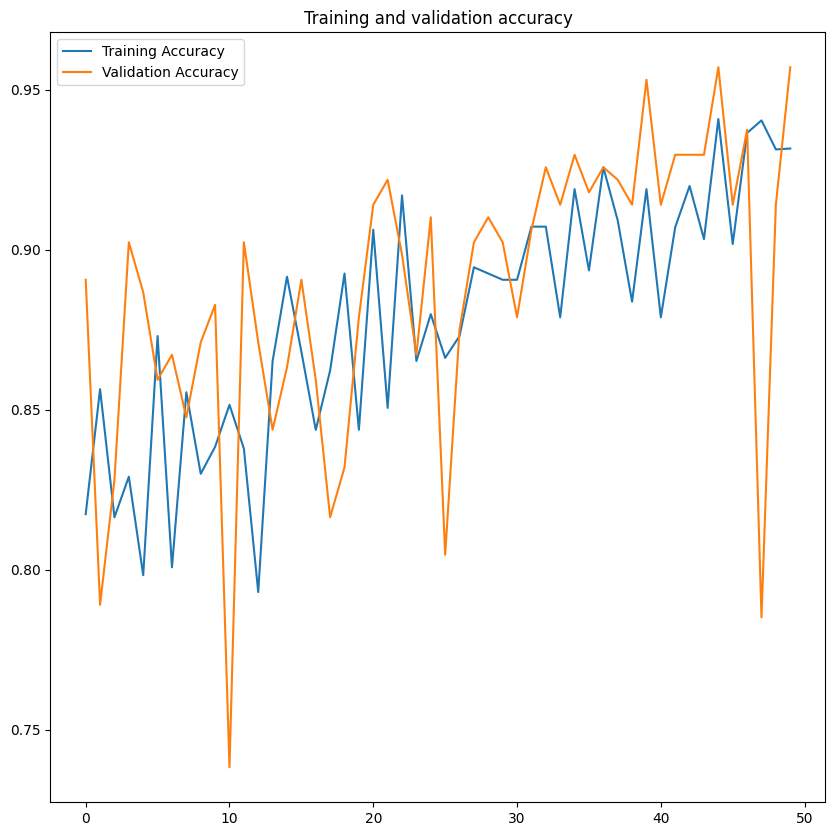

In [98]:
plt.figure(figsize=(10,10))
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend()
plt.title("Training and validation accuracy")

In [57]:
test_dataset = tf.keras.utils.image_dataset_from_directory("Testing",
                                                     shuffle=True,
                                                     batch_size = 32,
                                                     image_size = (IMAGE_SIZE,IMAGE_SIZE))

Found 405 files belonging to 3 classes.


In [90]:
classes = test_dataset.class_names
classes

['Early_Blight', 'Healthy', 'Late_Blight']

In [103]:
scores = model.evaluate(test_generator)

13/13 [==============================] - 1s 104ms/step - loss: 0.1266 - accuracy: 0.9605


In [92]:
def predict(model,img):
    image = tf.keras.utils.img_to_array(img)
    image = tf.expand_dims(image,0)
    
    pred = model.predict(image)
    pred_class = classes[np.argmax(pred[0])]
    confidence = round(100 * (np.max(pred[0])),2)
    return pred_class,confidence

In [93]:
import numpy as np

1/1 [==============================] - 0s 20ms/step


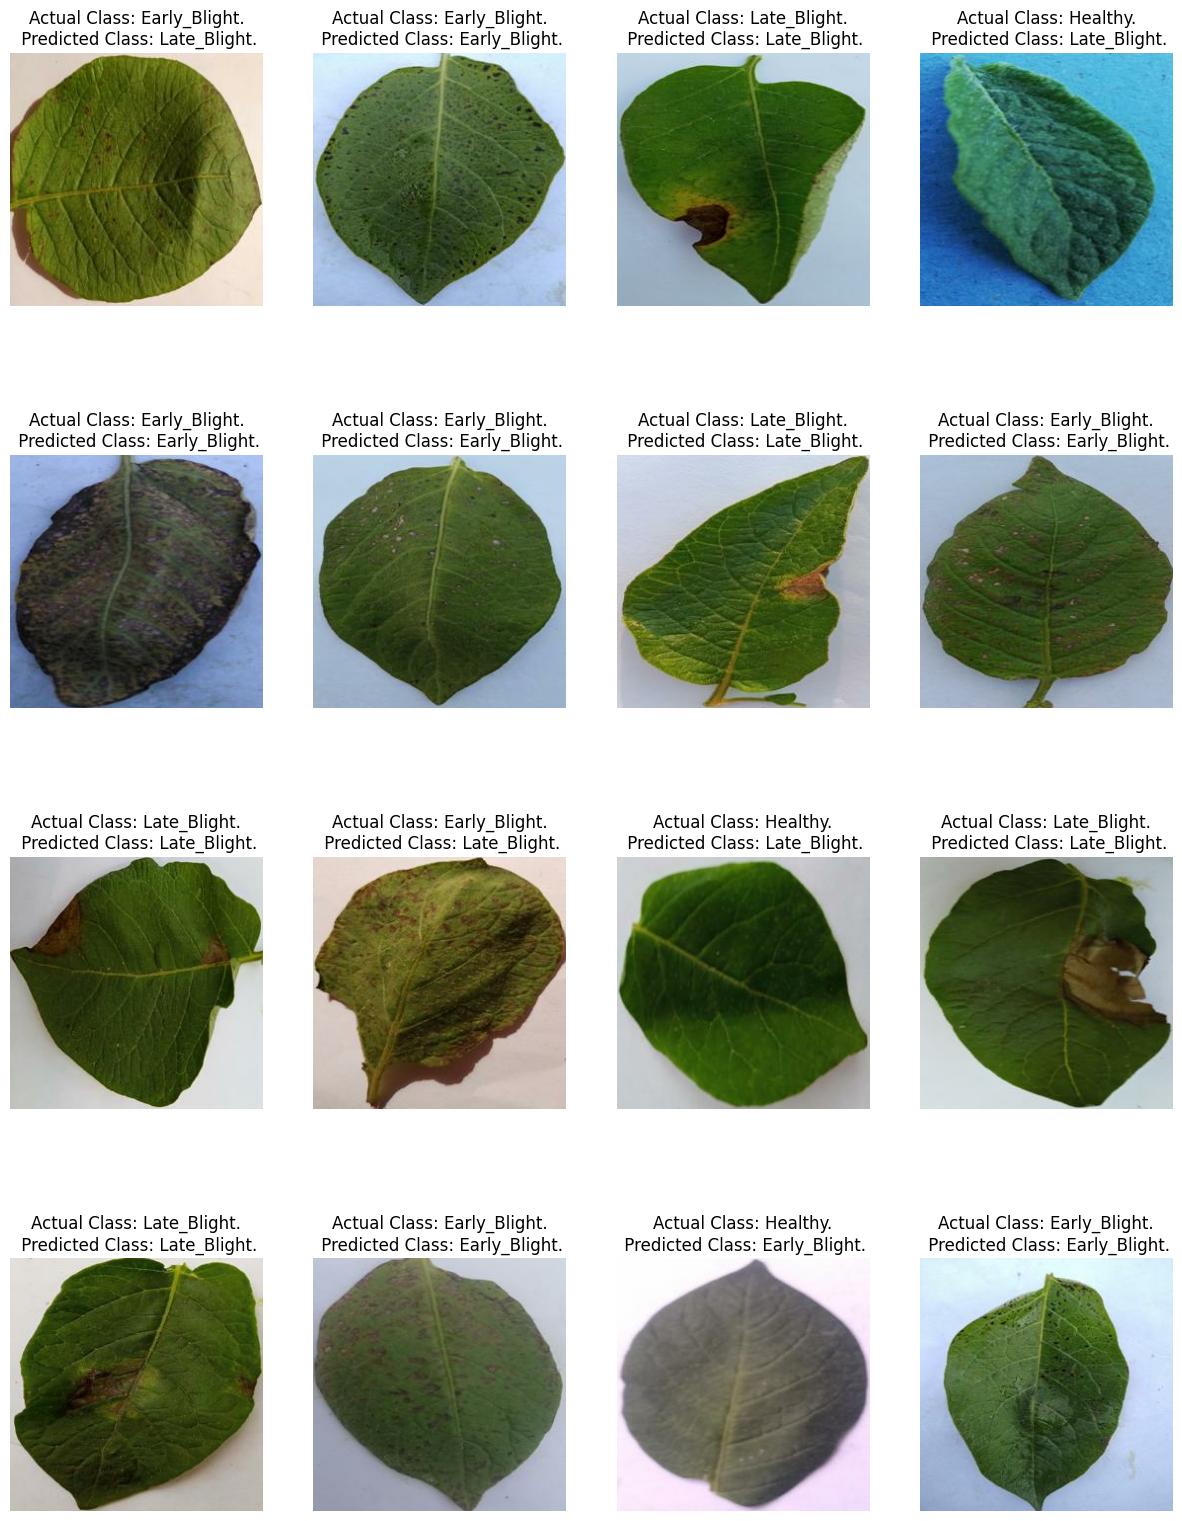

In [99]:
plt.figure(figsize=(15,20))
for image_batch,label_batch in test_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        pred_class,confidence = predict(model,image_batch[i].numpy());
        actual_class = classes[label_batch[i]]
        plt.title(f"Actual Class: {actual_class}.\n Predicted Class: {pred_class}.")
        plt.axis("off")

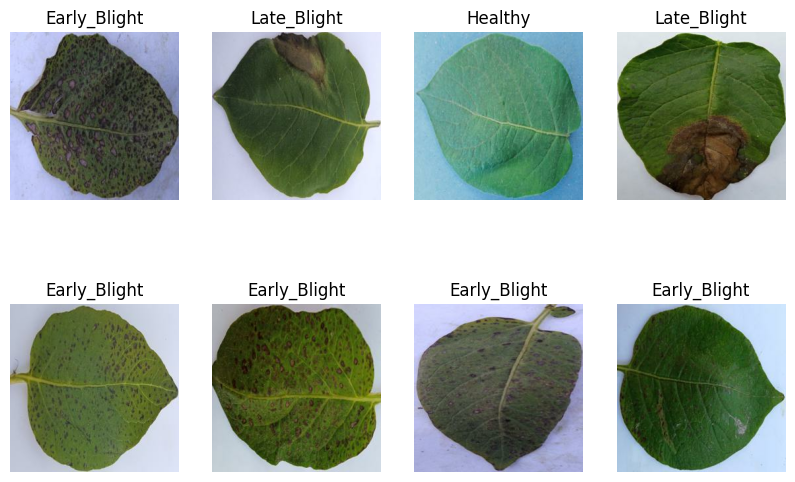

In [91]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in test_dataset.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(classes[label_batch[i]])
        plt.axis("off")

In [104]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\FRANDA~1\AppData\Local\Temp\tmp7us8vkh2\assets


INFO:tensorflow:Assets written to: C:\Users\FRANDA~1\AppData\Local\Temp\tmp7us8vkh2\assets


In [108]:
export_dir = 'saved_model3'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model3\assets


INFO:tensorflow:Assets written to: saved_model3\assets


In [109]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [110]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['conv2d_35_input'], 'outputs': ['dense_15']}}

In [111]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 30, 30, 64)      